# Livrable 2 : Modélisation, Implémentation et Etude Expérimentale

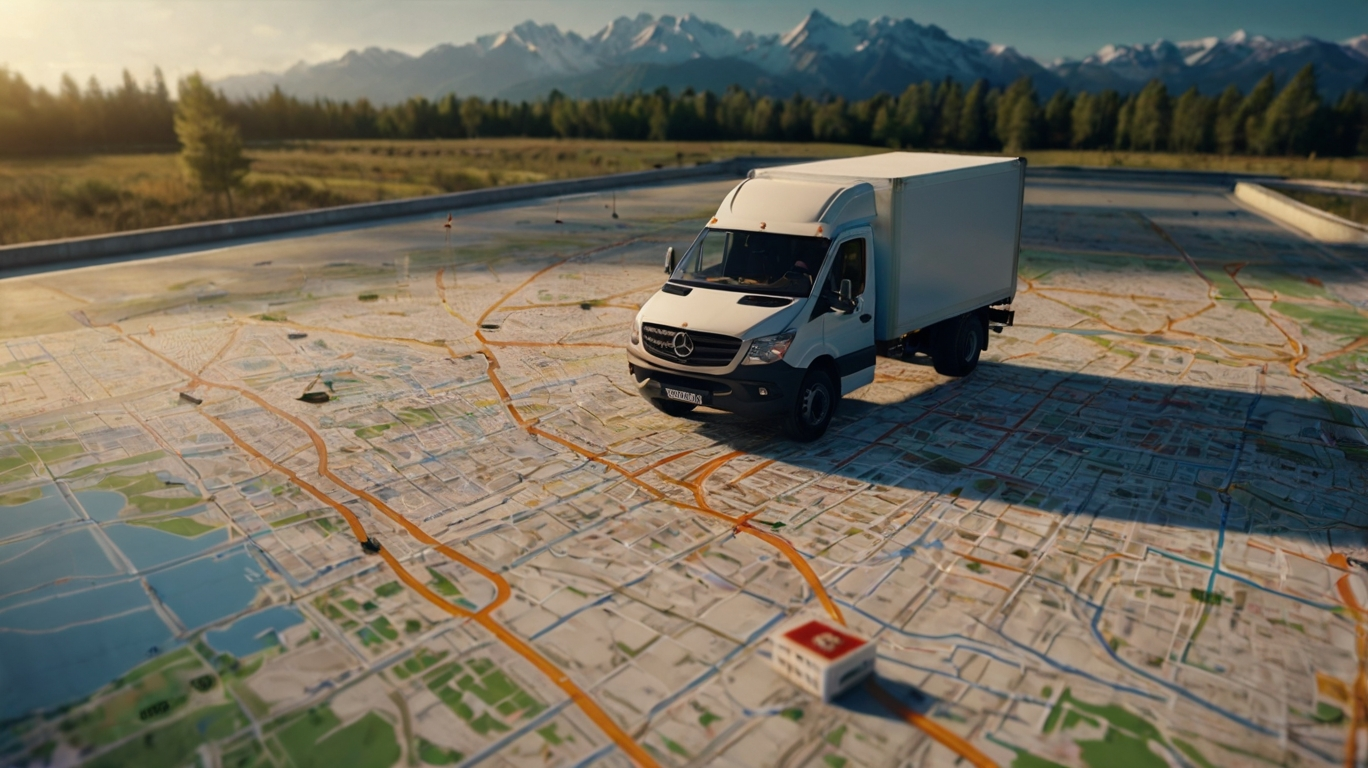

Equipe :
- LEFORESTIER Romain
- MAILLARD Florian
- LEJEUNE Pierre
- LE MEUR Tristan

# Partie 1 : Modélisation 

### 1. Définition des éléments de base

- **Véhicule** :
  - $V$ : Un seul véhicule disponible pour la collecte et la livraison.

- **Nœuds** :
  - $N$ : Ensemble des villes.
  - $s_0$ : Nœud de départ du véhicule.

- **Requêtes** :
  - $R$ : Ensemble des requêtes de collecte et de livraison.
  - Chaque requête $r_m$ est définie par une paire $(P_m, D_m)$, où $P_m$ est le point de collecte de l'objet $m$ et $D_m$ est un point de livraison de l'objet m.

- **Temps** :
  - $t$ : Temps actuel, variable dynamique.
  - $t_m^{pickup}$ : Temps de collecte pour la requête $r_m$.
  - $t_m^{delivery}$ : Temps de livraison pour la requête $r_m$.
  - $T$ : Temps final de la tournée.

- **Graph** :
  - $A(t) \subseteq N \times N$ : Ensemble des arcs disponibles à l'instant $t$, reflétant la connectivité entre les villes. Si $A_{ij}(t) \neq 1$, alors il n'y a pas de chemin entre $i$ et $j$

### 2. Variables de décision

- $x_{ij}(t)$ : Variable binaire indiquant si le véhicule se déplace du nœud $i$ au nœud $j$ à l'instant $t$ (1 si oui, 0 sinon).
- $p_i(t)$ : Variable binaire indiquant si le nœud $i$ est visité pour une collecte à l'instant $t$ (1 si oui, 0 sinon).
- $d_i(t)$ : Variable binaire indiquant si le nœud $i$ est visité pour une livraison à l'instant $t$ (1 si oui, 0 sinon).

### 3. Contraintes

1. **Collecte avant livraison** :

   $
   t_m^{pickup} \leq t_m^{delivery} \quad \forall r_m \in R
   $


2. **Lien collecte-livraison** :

   $
   d_i(t) \leq \sum_{t' \leq t} p_{P_m}(t') \quad \forall t, \forall i \text{ tel que } i = D_m
   $

3. **Conservation de flux** :

   $
   \sum_{j}^N x_{ij}(t) = \sum_{j}^N x_{jk}(t+1) \quad \forall i, k \in N, \forall t$ avec $i \neq j $ et $k \neq j
   $

4. **Départ initial** :

   $
   \sum_{j}^N x_{s_0 j}(0) = 1
   $
   avec
   $
   A_{s_0, j}(0) = 1
   $

5. **Retour final** :

   $
   \sum_{i}^N x_{i s_0}(T) = 1
   $
   avec
   $ 
   A_{i, s_0}(T) = 1
   $

6. **Fin de livraison** :

   $
   \sum_{i \in N} \sum_{t \leq T} d_i(t) = \text{ \(\lvert R \rvert\)}
   $
   
   Cette contrainte garantit que toutes les livraisons nécessaires ont été effectuées à la fin de la tournée.

7. **Connectivité des arcs** :

   $
   x_{ij}(t) \leq A_{ij}(t) \quad \forall i, j \in N, \forall t
   $
   où $A_{ij}(t)$ est une variable binaire indiquant si un arc entre $i$ et $j$ est disponible à l'instant $t$.

### 4. Fonction objectif

Minimiser la distance totale parcourue par le véhicule, tenant compte des variations temporelles des distances :
$[
\text{Minimiser} \quad \sum_{t} \sum_{i} \sum_{j} C_{ij}(t) \cdot x_{ij}(t)
]$
où $C_{ij}(t)$ est la distance entre les nœuds $i$ et $j$ à l'instant $t$, si l'arc $(i, j) \in A(t)$.

# Méthode de résolution choisie
## Méthode de Résolution : Algorithme de Colonies de Fourmis (Ant Colony Optimization, ACO)
L'algorithme de colonies de fourmis (ACO) est une métaheuristique inspirée par le comportement des fourmis cherchant de la nourriture. Cet algorithme est particulièrement utile pour résoudre des problèmes d'optimisation combinatoire, tels que le problème du voyageur de commerce (TSP) ou le problème du sac à dos. Il repose sur la coopération indirecte des fourmis via le dépôt et l'évaporation de phéromones.

### Détails de l'Algorithme Utilisé
## Initialisation :

Paramètres : Définir les paramètres clés tels que le nombre de fourmis, le nombre d'itérations, les taux de phéromones (initial, volatilité), et les coefficients influençant les phéromones et l'heuristique.
Phéromones : Initialiser les niveaux de phéromones sur chaque élément (objet, chemin, etc.) de manière uniforme ou avec des valeurs spécifiques.

### Construction des Solutions :

Voisinage et Sélection : Chaque fourmi construit une solution en ajoutant progressivement des composants (villes à visiter dans notre cas). La probabilité de choisir un composant dépend des niveaux de phéromones et de l'heuristique locale.
Heuristique : Utiliser une fonction heuristique (par exemple, les couts de chaque chemins) pour guider les choix des fourmis.
Contraintes : Assurer que les solutions respectent les contraintes du problème.

### Mise à Jour des Phéromones :

Évaporation : Réduire les niveaux de phéromones de manière uniforme pour simuler la volatilité naturelle des phéromones.
Dépôt : Augmenter les niveaux de phéromones sur les composants utilisés dans les solutions de haute qualité trouvées par les fourmis.


### Critère d'Arrêt :

Itérations : Répéter les étapes de construction et de mise à jour des phéromones pour un nombre fixe d'itérations ou jusqu'à ce que les solutions convergent.

### Modélisation du Problème
Pour appliquer l'ACO à notre problème voici comment nous modélisons chaque étape selon le formalisme de la métaheuristique :

#### Représentation des Solutions :

Une solution est représentée comme un vecteur binaire de longueur égale au nombre de villes au carré, où chaque élément indique si on passe par le chemin $ij$ durant notre trajet ou non.
#### Voisinage :

Le voisinage d'une solution consiste à inverser l'inclusion de chaque objet, générant ainsi des solutions voisines en ajoutant ou retirant un objet du sac.
#### Fonction Heuristique :

L'heuristique priorise certains chemins $P_{ij}^k = $ $\frac{\tau_{ij}(t)^\alpha \cdot \eta_{ij}^\beta}{\sum_{l \in J_i^k} \tau_{il}(t)^\alpha \cdot \eta_{il}^\beta}$

$p_{ij}^k(t) $ : Probabilité de transition de la ville $i$ à la ville $j$ pour la fourmi $k$ au temps $t$.

$\tau_{ij}(t)  $: Quantité de phéromones sur le chemin de la ville $i$ à la ville $j$ au temps $t$.
 
$\eta_{ij}$ : Heuristique de visibilité, typiquement l'inverse de la distance (le temps de déplacement entre $i$ et $j$ qui varie dans le temps dans notre cas) entre les villes $i$ et $j$.
 
$\alpha $ : Paramètre qui contrôle l'importance des phéromones.

$\beta $ : Paramètre qui contrôle l'importance de l'heuristique de visibilité.

$J_i^k $ : Ensemble des villes non visitées par la fourmi $k$ lors de la visite de la ville $i$.

#### Opérations de Sélection :

La sélection des chemins se fait de manière probabiliste en fonction de l'heuristique, cependant comme cette derniere est basée sur la quantité de phéromones de chaque chemins on finira par obtenir des chemin optimisés respectant nos contraintes.

### Conclusion
L'algorithme de colonies de fourmis (ACO) est une approche efficace pour résoudre notre problème. Il exploite la coopération indirecte entre les fourmis via les phéromones pour explorer l'espace de recherche de manière équilibrée entre exploration et exploitation. En suivant le formalisme de cette métaheuristique, nous avons modélisé le problème, construit des solutions viables et mis à jour les phéromones pour guider les itérations successives vers des solutions de meilleure qualité.

# Partie 2 : Implémentation 

In [29]:
import numpy as np
import random as rand
import math as m
import time
import networkx as nx
from ipywidgets import IntProgress
from IPython.display import display
from matplotlib import pyplot as plt
import heapq
import threading as th
from concurrent.futures import ThreadPoolExecutor

In [2]:
def generate_random_symmetrical_boolean_graph(n):
    """
    Generate a random symmetrical graph with n*n boolean values
    """
    while True:
        A = np.triu(np.random.randint(0, 2, (n, n)), 1)
        A += A.T
        if np.all(A.sum(axis=0)):
            return A

In [3]:
def generate_random_collect_points(cities):
    """
    Generate a random list of collect points.
    @cities : number of cities in the graph considered
    """
    return np.random.randint(0, 2, cities)

In [4]:
def generate_random_delivery_requests(cities, collect_points):
    """
    Generate a random list of delivery requests. 
    @cities : number of cities in the graph considered
    @collect_points : list of collect points where we can go fetch the object for a delivery request
    """
    deliveries = set()
    for i, collect in enumerate(collect_points):
        if collect:
            number_of_drop_points = rand.randint(1, cities)
            deliveries.update((i, rand.randint(0, cities - 1)) for _ in range(number_of_drop_points))
    return sorted(deliveries)

In [ ]:
def C(A, phi, alea, i, j, t, amplitude, offset, frequency):
    """
    Cost function between the cities i and j at time t.

    @param A: Graph of the cities.
    @param phi: Initial phases
    @param alea: Initial values to simulate randomness.
    @param i: City of departure.
    @param j: City of arrival.
    @param t: Time.
    @param amplitude: Amplitude of the cost function.
    @param offset: Offset of the cost function.
    @param frequency: Frequency of the cost function.
    """
    return max(1, round((amplitude * m.sin(frequency * t + phi[i][j]) + offset) * alea[i][j], 4)) if A[i][j] == 1 else float('inf')

In [15]:
def neighbors(A, i):
    """
    Return the neighbors of the city i in the graph A.
    """
    return [j for j in range(len(A[i])) if A[i][j] == 1]

In [16]:
def construct_path(solutions, max_iter_per_trial, A, R, pheromones, alpha, beta, gamma, neighbors_cache, cost):
    """
    Generate the path an ant do.
    @solutions : list of this generation solutions (empty when called for the first ant)
    @max_iter_per_trial : max number of main loop iterations we can do
    @A : the boolean graph which indicate where there is a path between cities
    @R : the list of delivery requests to do
    @pheromones : the graph which indicate the amount of pheromones on each path between cities
    @alpha : the influence of the pheromones on the ants' choices of next cities
    @beta : the influence of the distance (time cost between each cities) on the ants' choices of next cities
    @gamma : a value to make sure that the probability to take a path is not 0
    @neighbors_cache : function to cache the neighbors of the cities visited
    @cost : function to cache the time cost between cities we already calculated
    """
    n = len(A)
    X = []
    p = np.zeros(n)
    len_R = len(R)

    s0 = rand.randint(0, n - 1)

    cur = s0
    next_city = None

    deliveries_done = set() 
    t = 0
    trial = 0

    while (len(deliveries_done) < len_R or next_city != s0) and trial < max_iter_per_trial:
        
        neighbors_cur = neighbors_cache(A, cur)

        pheromone_values = np.array([pheromones[cur][neighbor] for neighbor in neighbors_cur])
        cost_values = np.array([cost(cur, neighbor, t) for neighbor in neighbors_cur])

        probabilities = gamma + (pheromone_values ** alpha) * ((1 / cost_values) ** beta)
        total_probabilities = probabilities.sum()

        if total_probabilities > 0:
            probabilities = (probabilities) / total_probabilities
            next_city = rand.choices(neighbors_cur, probabilities)[0]
        else:
            next_city = rand.choice(neighbors_cur)

        for i, j in R:
            if i == cur and p[cur] == 0:
                p[cur] = 1
            if j == cur and p[i] == 1:
                deliveries_done.add((i, j))
        
        X.append((cur, next_city))

        cur = next_city
        t += cost_values[neighbors_cur.index(next_city)]
        trial += 1

    solutions.append((X, s0))

In [19]:
def ants_colony(A, R, ants, phi, alea, amplitude, offset, frequency, alpha, beta, gamma, rho, Q, iterations, max_iter_per_trial):
    """
    Ants colony algorithm to solve the problem.
    @A : the boolean graph which indicate where there is a path between cities
    @R : the list of delivery requests to do
    
    @ants : number of ants for each generation
    
    @phi : graph with random initial phase for the time cost function for each path in the graph
    @alea : graph with random values for the time cost function for each path in the graph to introduce randomness
    @amplitude : amplitude of the time cost function
    @offset : offset of the time cost function
    @frequency : frequency of the time cost function
    
    @alpha : the influence of the pheromones on the ants' choices of next cities
    @beta : the influence of the distance (time cost between each cities) on the ants' choices of next cities
    @gamma : a value to make sure that the probability to take a path is not 0
    @rho : evaporation rate of the pheromones
    @Q : number of pheromones to add at each generation
    
    @iterations : number of generation
    @max_iter_per_trial : max number of main loop iterations we can do
    """
    start_time = time.time()
    n = len(A)
    
    best_solution = None

    pheromones = np.ones((n, n))


    neighbors_list = {}
    cost_cache = {}

    def neighbors_cache(A, i):
        if(i not in neighbors_list):
            neighbors_list[i] = neighbors(A, i)
        return neighbors_list[i]
    
    def cost(i, j, t):
        if (i, j, t) not in cost_cache:
            cost_cache[(i, j, t)] = C(A, phi, alea, i, j, t, amplitude, offset, frequency)
        return cost_cache[(i, j, t)]

    for _ in range(iterations):
        solutions_temp = []
        for _ in range(ants):
            construct_path(solutions_temp, max_iter_per_trial, A, R, pheromones, alpha, beta, gamma, neighbors_cache, cost)
        
        for X, s0 in solutions_temp:
            cost_solution = 0
            for i, j in X:
                cost_solution += cost(i, j, cost_solution)
            pheromone_deposit = Q / cost_solution
            for i, j in X:
                pheromones[i][j] += pheromone_deposit
                pheromones[j][i] += pheromone_deposit
            pheromones *= (1 - rho)
            
            if best_solution is None or cost_solution < best_solution[1]:
                best_solution = (X, cost_solution)
    
    end_time = time.time()  # End the timer
    time_taken = end_time - start_time  # Calculate the time taken

    return best_solution, time_taken


In [41]:
def draw_graph_with_path_and_weights(graph, path, phi, Temp, amplitude, offset, frequency):
    G = nx.Graph()
    for i in range(len(graph)):
        for j in range(i, len(graph[i])):
            if graph[i][j] > 0:
                G.add_edge(i, j, weight=C(i, j, 0, phi, Temp, amplitude, offset, frequency))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700)
    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    plt.title('Graph with Path and Edge Weights')
    plt.show()

In [22]:
# Constants for the ACO algorithm
NB_ANTS = 10 # Number of ants
NB_ITERATIONS = 10  # Number of generations
ALPHA = 1.0  # Influence of pheromones
BETA = 2.0  # Influence of the heuristic (inverse of the distance)
GAMMA = 0.1
RHO = 0.5  # Pheromone evaporation rate
Q = 100  # Quantity of pheromones deposited

MAX_NUMBERS_OF_TRIALS = 100000


if __name__ == '__main__':
    n = 100
    phi = np.random.uniform(0.5, 5, (n, n))
    alea = np.random.uniform(0, 20, (n, n))
    amplitude = 0.7
    offset = 0.3
    frequency = 0.5

    graph = generate_random_symmetrical_boolean_graph(n)
    collect_points = generate_random_collect_points(n)
    deliveries = generate_random_delivery_requests(n, collect_points)
    print("\n Deliveries:")
    for delivery in deliveries:
        print(f"Object from city {int(delivery[0])} need to be deliver in city: {int(delivery[1])}")

    best_solution, time_taken = ants_colony(graph, deliveries, NB_ANTS, phi, alea, amplitude, offset, frequency, ALPHA, BETA, GAMMA, RHO, Q, NB_ITERATIONS, MAX_NUMBERS_OF_TRIALS)
    if best_solution:
        print("\nBest path starting from city", best_solution[0][0][0], ":", best_solution)
        print("Cost of best path:", best_solution[1])
        print("Time taken:", time_taken, "seconds")
        #draw_graph_with_path_and_weights(graph, best_path, phi, Temp, amplitude, offset, frequency)
    else:
        print("No valid path was found that meets all delivery requirements.")


 Deliveries:
Object from city 0 need to be deliver in city: 0
Object from city 0 need to be deliver in city: 3
Object from city 0 need to be deliver in city: 7
Object from city 0 need to be deliver in city: 9
Object from city 0 need to be deliver in city: 12
Object from city 0 need to be deliver in city: 14
Object from city 0 need to be deliver in city: 16
Object from city 0 need to be deliver in city: 18
Object from city 0 need to be deliver in city: 19
Object from city 0 need to be deliver in city: 20
Object from city 0 need to be deliver in city: 22
Object from city 0 need to be deliver in city: 27
Object from city 0 need to be deliver in city: 28
Object from city 0 need to be deliver in city: 29
Object from city 0 need to be deliver in city: 33
Object from city 0 need to be deliver in city: 35
Object from city 0 need to be deliver in city: 37
Object from city 0 need to be deliver in city: 38
Object from city 0 need to be deliver in city: 39
Object from city 0 need to be deliver in

### Parallélisation

In [25]:
def construct_path_parallelized(solutions, solutions_lock, max_iter_per_trial, A, R, pheromones, pheromone_lock, alpha, beta, gamma, neighbors_cache, cost):
    """
    Generate the path an ant do.
    @solutions : list of this generation solutions (empty when called for the first ant)
    @solutions_lock : lock to manage access to the list of the generation solutions
    @max_iter_per_trial : max number of main loop iterations we can do
    @A : the boolean graph which indicate where there is a path between cities
    @R : the list of delivery requests to do
    @pheromones : the graph which indicate the amount of pheromones on each path between cities
    @pheromone_lock : lock to manage access to the graph of pheromone values
    @alpha : the influence of the pheromones on the ants' choices of next cities
    @beta : the influence of the distance (time cost between each cities) on the ants' choices of next cities
    @gamma : a value to make sure that the probability to take a path is not 0
    @neighbors_cache : function to cache the neighbors of the cities visited
    @cost : function to cache the time cost between cities we already calculated
    """
    n = len(A)
    X = []
    p = np.zeros(n)
    len_R = len(R)

    s0 = rand.randint(0, n - 1)

    cur = s0
    next_city = None

    deliveries_done = set() 
    t = 0
    trial = 0

    while (len(deliveries_done) < len_R or next_city != s0) and trial < max_iter_per_trial:
        
        neighbors_cur = neighbors_cache(A, cur)
        

        with pheromone_lock:
            pheromone_values = np.array([pheromones[cur][neighbor] for neighbor in neighbors_cur])
        cost_values = np.array([cost(cur, neighbor, t) for neighbor in neighbors_cur])

        probabilities = gamma + (pheromone_values ** alpha) * ((1 / cost_values) ** beta)
        total_probabilities = probabilities.sum()

        if total_probabilities > 0:
            probabilities = (probabilities) / total_probabilities
            next_city = rand.choices(neighbors_cur, probabilities)[0]
        else:
            next_city = rand.choice(neighbors_cur)

        for i, j in R:
            if i == cur and p[cur] == 0:
                p[cur] = 1
            if j == cur and p[i] == 1:
                deliveries_done.add((i, j))
        
        X.append((cur, next_city))

        cur = next_city
        t += cost_values[neighbors_cur.index(next_city)]
        trial += 1
    
    with solutions_lock:
        solutions.append((X, s0))

In [31]:
def ants_colony_parallelized(A, R, ants, phi, alea, amplitude, offset, frequency, alpha, beta, gamma, rho, Q, iterations, max_iter_per_trial):
    """
    Ants colony algorithm to solve the problem.
    @A : the boolean graph which indicate where there is a path between cities
    @R : the list of delivery requests to do
    
    @ants : number of ants for each generation
    
    @phi : graph with random initial phase for the time cost function for each path in the graph
    @alea : graph with random values for the time cost function for each path in the graph to introduce randomness
    @amplitude : amplitude of the time cost function
    @offset : offset of the time cost function
    @frequency : frequency of the time cost function
    
    @alpha : the influence of the pheromones on the ants' choices of next cities
    @beta : the influence of the distance (time cost between each cities) on the ants' choices of next cities
    @gamma : a value to make sure that the probability to take a path is not 0
    @rho : evaporation rate of the pheromones
    @Q : number of pheromones to add at each generation
    
    @iterations : number of generation
    @max_iter_per_trial : max number of main loop iterations we can do
    """
    start_time = time.time()
    n = len(A)
    
    best_solution = None
    
    
    solutions_lock = th.Lock()
    pheromones_lock = th.Lock()
    
    
    pheromones = np.ones((n, n))


    neighbors_list = {}
    cost_cache = {}

    def neighbors_cache(A, i):
        if(i not in neighbors_list):
            neighbors_list[i] = neighbors(A, i)
        return neighbors_list[i]
    
    def cost(i, j, t):
        if (i, j, t) not in cost_cache:
            cost_cache[(i, j, t)] = C(A, phi, alea, i, j, t, amplitude, offset, frequency)
        return cost_cache[(i, j, t)]

    for _ in range(iterations):
        solutions_temp = []
        with ThreadPoolExecutor(max_workers=ants) as executor:
            futures = [
                executor.submit(
                    construct_path_parallelized,
                    solutions_temp,
                    solutions_lock,
                    max_iter_per_trial,
                    A,
                    R,
                    pheromones,
                    pheromones_lock,
                    alpha,
                    beta,
                    gamma,
                    neighbors_cache,
                    cost
                ) for _ in range(ants)
            ]
        
        for future in futures:
            future.result()
        
        for X, s0 in solutions_temp:
            cost_solution = 0
            for i, j in X:
                cost_solution += cost(i, j, cost_solution)
            pheromone_deposit = Q / cost_solution
            for i, j in X:
                pheromones[i][j] += pheromone_deposit
                pheromones[j][i] += pheromone_deposit
            pheromones *= (1 - rho)
            
            if best_solution is None or cost_solution < best_solution[1]:
                best_solution = (X, cost_solution)
    
    end_time = time.time()  # End the timer
    time_taken = end_time - start_time  # Calculate the time taken

    return best_solution, time_taken


In [32]:
# Constants for the ACO algorithm
NB_ANTS = 10 # Number of ants
NB_ITERATIONS = 10  # Number of generations
ALPHA = 1.0  # Influence of pheromones
BETA = 2.0  # Influence of the heuristic (inverse of the distance)
GAMMA = 0.1
RHO = 0.5  # Pheromone evaporation rate
Q = 100  # Quantity of pheromones deposited

MAX_NUMBERS_OF_TRIALS = 100000


if __name__ == '__main__':
    n = 100
    phi = np.random.uniform(0.5, 5, (n, n))
    alea = np.random.uniform(0, 20, (n, n))
    amplitude = 0.7
    offset = 0.3
    frequency = 0.5

    graph = generate_random_symmetrical_boolean_graph(n)
    collect_points = generate_random_collect_points(n)
    deliveries = generate_random_delivery_requests(n, collect_points)
    print("\n Deliveries:")
    for delivery in deliveries:
        print(f"Object from city {int(delivery[0])} need to be deliver in city: {int(delivery[1])}")

    best_solution, time_taken = ants_colony_parallelized(graph, deliveries, NB_ANTS, phi, alea, amplitude, offset, frequency, ALPHA, BETA, GAMMA, RHO, Q, NB_ITERATIONS, MAX_NUMBERS_OF_TRIALS)
    if best_solution:
        print("\nBest path starting from city", best_solution[0][0][0], ":", best_solution)
        print("Cost of best path:", best_solution[1])
        print("Time taken:", time_taken, "seconds")
        #draw_graph_with_path_and_weights(graph, best_path, phi, Temp, amplitude, offset, frequency)
    else:
        print("No valid path was found that meets all delivery requirements.")


 Deliveries:
Object from city 2 need to be deliver in city: 0
Object from city 2 need to be deliver in city: 3
Object from city 2 need to be deliver in city: 4
Object from city 2 need to be deliver in city: 7
Object from city 2 need to be deliver in city: 10
Object from city 2 need to be deliver in city: 16
Object from city 2 need to be deliver in city: 19
Object from city 2 need to be deliver in city: 22
Object from city 2 need to be deliver in city: 23
Object from city 2 need to be deliver in city: 25
Object from city 2 need to be deliver in city: 26
Object from city 2 need to be deliver in city: 27
Object from city 2 need to be deliver in city: 30
Object from city 2 need to be deliver in city: 32
Object from city 2 need to be deliver in city: 42
Object from city 2 need to be deliver in city: 43
Object from city 2 need to be deliver in city: 62
Object from city 2 need to be deliver in city: 68
Object from city 2 need to be deliver in city: 70
Object from city 2 need to be deliver in

# Partie 3 : Etude expérimentale

# Plan d'experience 
##  Méthodologie
 Pour évaluer les performances de notre algorithme, nous allons varier les paramètres suivants :

 - Nombre de villes (n) 
 - Amplitude du coût dynamique (amplitude) 
 - Offset du coût dynamique (offset) 
 - Fréquence du coût dynamique (frequency) 
 - Nombre de fourmis (nb_fourmis) 
 - Nombre d'itérations (nb_iterations)
 - Influence des phéromones (alpha) 
 - Influence de l'heuristique (beta) 
 - Taux d'évaporation des phéromones (rho) 
 - Quantité de phéromones déposée (q) 

## Etude du comportement des parametres 

In [ ]:
def run_test(n, amplitude, offset, frequency, nb_ants, nb_iterations, alpha, beta, gamma, rho, q, max_trials):
    global NB_ANTS, NB_ITERATIONS, ALPHA, BETA, GAMMA, RHO, Q, MAX_NUMBERS_OF_TRIALS
    NB_ANTS, NB_ITERATIONS, ALPHA, BETA, GAMMA, RHO, Q, MAX_NUMBERS_OF_TRIALS = nb_ants, nb_iterations, alpha, beta, gamma, rho, q, max_trials
    
    phi = np.random.uniform(0.5, 5, (n, n))
    alea = np.random.uniform(0, 20, (n, n))

    graph = generate_random_symmetrical_boolean_graph(n)
    collect_points = generate_random_collect_points(n)
    deliveries = generate_random_delivery_requests(n, collect_points)
    best_solution, time_taken = ants_colony(graph, deliveries, NB_ANTS, phi, alea, amplitude, offset, frequency, ALPHA, BETA, GAMMA, RHO, Q, NB_ITERATIONS, MAX_NUMBERS_OF_TRIALS)
    if best_solution:
        print("Cost of best path:", best_solution[1])
        print("Time taken:", time_taken, "seconds")    
    else:
        print("No valid path was found that meets all delivery requirements.")

In [ ]:
def run_test_amplitude(n, amplitude_min, amplitude_max,amplitude_step, iterations):
    average_times =[]
    worst_times = []
    best_times = []
    

    nb_tests = ((amplitude_max	- amplitude_min) / amplitude_step) * iterations
    bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
    display(bar)
    for amp in range(amplitude_min, amplitude_max, amplitude_step):
        best_time = float('inf')
        worst_time = 0
        average_time = 0
        amplitude = amp/10
        for i in range(iterations): 
            print(f"\nRunning test with amplitude: {amplitude}")
        
            start = time.time()
            run_test(n, amplitude, 0.3, 0.5, 10, 10, 1.0, 2.0, 0.1, 0.5, 100, 100000)
            stop = time.time()

            tps = stop - start
            if(tps > worst_time):
                worst_time = tps

            if(tps < best_time):
                best_time = tps

            average_time += tps
            
            bar.value += 1 # on met à jour la barre de progression
        
        # on met à jour les listes des temps d'exécution
        average_times.append(average_time/iterations)
        best_times.append(best_time)
        worst_times.append(worst_time)

    # on cache la barre de progression
    bar.close()
    
    # on règle l'affichage des courbes
    amplitudes = [x for x in range(amplitude_min, amplitude_max, amplitude_step)]
    plt.figure(figsize=(20,10))
    
    plt.xlabel('amplitude')
    plt.xticks(ticks=amplitudes) # valeurs affichées sur l'axe X
    plt.ylabel('temps de calcul')
    
    # on charge les données
    plt.plot(amplitudes, average_times,   label='average time')
    plt.plot(amplitudes, best_times, label='best time')
    plt.plot(amplitudes, worst_times,  label='worst time')
    
    # on affiche
    plt.legend()
    plt.show()

In [ ]:
run_test_amplitude(50,7,15,2, 100)

IntProgress(value=0, layout=Layout(width='100%'), max=400)


Running test with amplitude: 0.7
Cost of best path: 463.48260000000005
Time taken: 6.982893228530884 seconds

Running test with amplitude: 0.7
Cost of best path: 547.9889000000002
Time taken: 6.088881254196167 seconds

Running test with amplitude: 0.7
Cost of best path: 471.8869999999999
Time taken: 7.506588935852051 seconds

Running test with amplitude: 0.7
Cost of best path: 492.2971999999999
Time taken: 6.632637977600098 seconds

Running test with amplitude: 0.7
Cost of best path: 521.8208
Time taken: 7.586040735244751 seconds

Running test with amplitude: 0.7
Cost of best path: 570.8678000000001
Time taken: 7.224344253540039 seconds

Running test with amplitude: 0.7
Cost of best path: 471.5687
Time taken: 5.986928462982178 seconds

Running test with amplitude: 0.7
Cost of best path: 554.5943
Time taken: 6.617467403411865 seconds

Running test with amplitude: 0.7
Cost of best path: 616.1537999999998
Time taken: 6.87286114692688 seconds

Running test with amplitude: 0.7
Cost of best

In [ ]:
def run_test_offset(n, offset_min, offset_max,offset_step, iterations):
    average_times =[]
    worst_times = []
    best_times = []
    

    nb_tests = ((offset_max	- offset_min) / offset_step) * iterations
    bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
    display(bar)       
    for off in range(offset_min, offset_max,offset_step):
            best_time = float('inf')
            worst_time = 0
            average_time = 0
            offset = off/10
            for i in range(iterations): 
                print(f"\nRunning test with offset: {offset}")
            
                start = time.time()
                run_test(n, 0.7, offset, 0.5, 10, 10, 1.0, 2.0, 0.1, 0.5, 100, 100000)
                stop = time.time()
    
                tps = stop - start
                if(tps > worst_time):
                    worst_time = tps
    
                if(tps < best_time):
                    best_time = tps
    
                average_time += tps
                
                bar.value += 1 # on met à jour la barre de progression
        
        # on met à jour les listes des temps d'exécution
            average_times.append(average_time/iterations)
            best_times.append(best_time)
            worst_times.append(worst_time)

    # on cache la barre de progression
    bar.close()
    
    # on règle l'affichage des courbes
    offsets = [x for x in range(offset_min, offset_max, offset_step)]
    plt.figure(figsize=(20,10))
    
    plt.xlabel('offset')
    plt.xticks(ticks=offsets) # valeurs affichées sur l'axe X
    plt.ylabel('temps de calcul')
    
    # on charge les données
    plt.plot(offsets, average_times,   label='average time')
    plt.plot(offsets, best_times, label='best time')
    plt.plot(offsets, worst_times,  label='worst time')
    
    # on affiche
    plt.legend()
    plt.show()

In [ ]:
run_test_offset(50,7,15,2, 100)

In [ ]:
def run_test_frequency(n,frequency_min, frequency_max,frequency_step, iterations):    
       
    average_times =[]
    worst_times = []
    best_times = []

    nb_tests = ((frequency_max	- frequency_min) / frequency_step) * iterations
    bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
    display(bar)       
    for freq in range(frequency_min, frequency_max,frequency_step):
            best_time = float('inf')
            worst_time = 0
            average_time = 0
            frequencies = freq/10
            for i in range(iterations): 
                print(f"\nRunning test with frequency: {frequency}")
                start = time.time()
                run_test(n, 0.7, 0.3, frequency, 10, 10, 1.0, 2.0, 0.1, 0.5, 100, 100000)
                stop = time.time()
    
                tps = stop - start
                if(tps > worst_time):
                    worst_time = tps
    
                if(tps < best_time):
                    best_time = tps
    
                average_time += tps
                
                bar.value += 1 # on met à jour la barre de progression
        
        # on met à jour les listes des temps d'exécution
            average_times.append(average_time/iterations)
            best_times.append(best_time)
            worst_times.append(worst_time)

    # on cache la barre de progression
    bar.close()
    
    # on règle l'affichage des courbes
    frequencies = [x for x in range(frequency_min, frequency_max, frequency_step)]
    plt.figure(figsize=(20,10))
    
    plt.xlabel('frequency')
    plt.xticks(ticks=frequencies) # valeurs affichées sur l'axe X
    plt.ylabel('temps de calcul')
    
    # on charge les données
    plt.plot(frequencies, average_times, label='average time')
    plt.plot(frequencies, best_times, label='best time')
    plt.plot(frequencies, worst_times,  label='worst time')
    
    # on affiche
    plt.legend()
    plt.show()

In [ ]:
run_test_frequency(50, 7,15,2, 100)

In [ ]:
def run_test_alpha(n, alpha_min, alpha_max, alpha_step, iterations):    
    average_times =[]
    worst_times = []
    best_times = []

    nb_tests = ((alpha_max	- alpha_min) / alpha_step) * iterations
    bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
    display(bar)       
    for al in range(alpha_min, alpha_max,alpha_step):
            best_time = float('inf')
            worst_time = 0
            average_time = 0
            alpha = al/10
            for i in range(iterations): 
                print(f"\nRunning test with alpha: {alpha}")
                start = time.time()
                run_test(n, 0.7, 0.3, 0.5, 10, 10, alpha, 2.0, 0.1, 0.5, 100, 100000)
                stop = time.time()
    
                tps = stop - start
                if(tps > worst_time):
                    worst_time = tps
    
                if(tps < best_time):
                    best_time = tps
    
                average_time += tps
                
                bar.value += 1 # on met à jour la barre de progression
        
        # on met à jour les listes des temps d'exécution
            average_times.append(average_time/iterations)
            best_times.append(best_time)
            worst_times.append(worst_time)

    # on cache la barre de progression
    bar.close()
    
    # on règle l'affichage des courbes
    alphas = [x for x in range(alpha_min, alpha_max, alpha_step)]
    plt.figure(figsize=(20,10))
    
    plt.xlabel('alpha')
    plt.xticks(ticks=alphas) # valeurs affichées sur l'axe X
    plt.ylabel('temps de calcul')
    
    # on charge les données
    plt.plot(alphas, average_times, label='average time')
    plt.plot(alphas, best_times, label='best time')
    plt.plot(alphas, worst_times,  label='worst time')
    
    # on affiche
    plt.legend()
    plt.show()

In [ ]:
run_test_alpha(50, 10,20,5,100)

In [ ]:
def run_test_beta(n,beta_min, beta_max, beta_step, iterations):
    average_times =[]
    worst_times = []
    best_times = []

    nb_tests = ((beta_max	- beta_min) / beta_step) * iterations
    bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
    display(bar)       
    for bet in range(beta_min, beta_max,beta_step):
            best_time = float('inf')
            worst_time = 0
            average_time = 0
            beta = bet/10
            for i in range(iterations): 
                print(f"\nRunning test with beta: {beta}")
                start = time.time()
                run_test(n, 0.7, 0.3, 0.5, 10, 10, 1.0, beta, 0.1, 0.5, 100, 100000)
                stop = time.time()
    
                tps = stop - start
                if(tps > worst_time):
                    worst_time = tps
    
                if(tps < best_time):
                    best_time = tps
    
                average_time += tps
                
                bar.value += 1 # on met à jour la barre de progression
        
        # on met à jour les listes des temps d'exécution
            average_times.append(average_time/iterations)
            best_times.append(best_time)
            worst_times.append(worst_time)

    # on cache la barre de progression
    bar.close()
    
    # on règle l'affichage des courbes
    betas = [x for x in range(beta_min, beta_max, beta_step)]
    plt.figure(figsize=(20,10))
    
    plt.xlabel('beta')
    plt.xticks(ticks=betas) # valeurs affichées sur l'axe X
    plt.ylabel('Calcul time')
    
    # on charge les données
    plt.plot(betas, average_times, label='average time')
    plt.plot(betas, best_times, label='best time')
    plt.plot(betas, worst_times,  label='worst time')
    
    # on affiche
    plt.legend()
    plt.show()

In [ ]:
run_test_beta(50,20,30,5,100)

In [ ]:
def run_test_rho(n,roh_min, roh_max, roh_step, iterations):
    average_times =[]
    worst_times = []
    best_times = []

    nb_tests = ((roh_max	- roh_min) / roh_step) * iterations
    bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
    display(bar)       
    for rh in range(roh_min, roh_max,roh_step):
            best_time = float('inf')
            worst_time = 0
            average_time = 0
            roh = rh/10
            for i in range(iterations): 
                print(f"\nRunning test with rho: {roh}")
                start = time.time()
                run_test(n, 0.7, 0.3, 0.5, 10, 10, 1.0, 2.0, 0.1, roh, 100, 100000)

                stop = time.time()
    
                tps = stop - start
                if(tps > worst_time):
                    worst_time = tps
    
                if(tps < best_time):
                    best_time = tps
    
                average_time += tps
                
                bar.value += 1 # on met à jour la barre de progression
        
        # on met à jour les listes des temps d'exécution
            average_times.append(average_time/iterations)
            best_times.append(best_time)
            worst_times.append(worst_time)

    # on cache la barre de progression
    bar.close()
    
    # on règle l'affichage des courbes
    rohs = [x for x in range(roh_min, roh_max, roh_step)]
    plt.figure(figsize=(20,10))
    
    plt.xlabel('rhos')
    plt.xticks(ticks=rohs) # valeurs affichées sur l'axe X
    plt.ylabel('Calcul time')
    
    # on charge les données
    plt.plot(rohs, average_times, label='average time')
    plt.plot(rohs, best_times, label='best time')
    plt.plot(rohs, worst_times,  label='worst time')
    
    # on affiche
    plt.legend()
    plt.show()

In [ ]:
run_test_rho(50, 5,9,2,100)

In [ ]:
def run_test_q(n,q_min, q_max, q_step, iterations):
    average_times =[]
    worst_times = []
    best_times = []

    nb_tests = ((q_max	- q_min) / q_step) * iterations
    bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
    display(bar)       
    for qq in range(q_min, q_max,q_step):
            best_time = float('inf')
            worst_time = 0
            average_time = 0
            q = qq/10
            for i in range(iterations): 
                print(f"\nRunning test with q: {q}")
                start = time.time()
                run_test(n, 0.7, 0.3, 0.5, 10, 10, 1.0, 2.0, 0.1, 0.5, q, 100000)

                stop = time.time()
    
                tps = stop - start
                if(tps > worst_time):
                    worst_time = tps
    
                if(tps < best_time):
                    best_time = tps
    
                average_time += tps
                
                bar.value += 1 # on met à jour la barre de progression
        
        # on met à jour les listes des temps d'exécution
            average_times.append(average_time/iterations)
            best_times.append(best_time)
            worst_times.append(worst_time)

    # on cache la barre de progression
    bar.close()
    
    # on règle l'affichage des courbes
    qs = [x for x in range(q_min, q_max, q_step)]
    plt.figure(figsize=(20,10))
    
    plt.xlabel('q')
    plt.xticks(ticks=qs) # valeurs affichées sur l'axe X
    plt.ylabel('Calcul time')
    
    # on charge les données
    plt.plot(qs, average_times, label='average time')
    plt.plot(qs, best_times, label='best time')
    plt.plot(qs, worst_times,  label='worst time')
    
    # on affiche
    plt.legend()
    plt.show()

In [ ]:
run_test_q(50, 1000,3000, 100,100)

In [ ]:
def run_test_n(n_min, n_max, n_step, iterations):
    average_times =[]
    worst_times = []
    best_times = []

    nb_tests = ((n_max	- n_min) / n_step) * iterations
    bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
    display(bar)       
    for n in range(n_min, n_max, n_step):
            best_time = float('inf')
            worst_time = 0
            average_time = 0
        
            for i in range(iterations): 
                print(f"\nRunning test with n: {n}")
                start = time.time()
                run_test(n, 0.7, 0.3, 0.5, 10, 10, 1.0, 2.0, 0.1, 0.5, 100, 100000)

                stop = time.time()
    
                tps = stop - start
                if(tps > worst_time):
                    worst_time = tps
    
                if(tps < best_time):
                    best_time = tps
    
                average_time += tps
                
                bar.value += 1 # on met à jour la barre de progression
        
        # on met à jour les listes des temps d'exécution
            average_times.append(average_time/iterations)
            best_times.append(best_time)
            worst_times.append(worst_time)

    # on cache la barre de progression
    bar.close()
    
    # on règle l'affichage des courbes
    qs = [x for x in range(n_min, n_max, n_step)]
    plt.figure(figsize=(20,10))
    
    plt.xlabel('N : number of cities')
    plt.xticks(ticks=qs) # valeurs affichées sur l'axe X
    plt.ylabel('Calcul time')
    
    # on charge les données
    plt.plot(qs, average_times, label='average time')
    plt.plot(qs, best_times, label='best time')
    plt.plot(qs, worst_times,  label='worst time')
    
    # on affiche
    plt.legend()
    plt.show()

In [ ]:
run_test_n(10,100, 10, 100)

In [ ]:
def run_test_ants(n, ants_min, ants_max, ants_step, iterations):
    average_times =[]
    worst_times = []
    best_times = []

    nb_tests = ((ants_max	- ants_min) / ants_step) * iterations
    bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
    display(bar)       
    for ant in range(ants_min, ants_max, ants_step):
            best_time = float('inf')
            worst_time = 0
            average_time = 0
        
            for i in range(iterations): 
                print(f"\nRunning test with ants: {ant}")
                start = time.time()
                run_test(n, 0.7, 0.3, 0.5, ant, 10, 1.0, 2.0, 0.1, 0.5, 100, 100000)

                stop = time.time()
    
                tps = stop - start
                if(tps > worst_time):
                    worst_time = tps
    
                if(tps < best_time):
                    best_time = tps
    
                average_time += tps
                
                bar.value += 1 # on met à jour la barre de progression
        
        # on met à jour les listes des temps d'exécution
            average_times.append(average_time/iterations)
            best_times.append(best_time)
            worst_times.append(worst_time)

    # on cache la barre de progression
    bar.close()
    
    # on règle l'affichage des courbes
    qs = [x for x in range(ants_min, ants_max, ants_step)]
    plt.figure(figsize=(20,10))
    
    plt.xlabel('Number of ants')
    plt.xticks(ticks=qs) # valeurs affichées sur l'axe X
    plt.ylabel('Calcul time')
    
    # on charge les données
    plt.plot(qs, average_times, label='average time')
    plt.plot(qs, best_times, label='best time')
    plt.plot(qs, worst_times,  label='worst time')
    
    # on affiche
    plt.legend()
    plt.show()

In [ ]:
run_test_ants(10, 1, 10, 1,100)

In [ ]:
def run_test_generation(n, g_min, g_max, g_step, iterations):
    average_times =[]
    worst_times = []
    best_times = []

    nb_tests = ((g_max	- g_min) / g_step) * iterations
    bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
    display(bar)       
    for ant in range(g_min, g_max, g_step):
            best_time = float('inf')
            worst_time = 0
            average_time = 0
        
            for i in range(iterations): 
                print(f"\nRunning test with generation: {g}")
                start = time.time()
                run_test(n, 0.7, 0.3, 0.5, 10, g, 1.0, 2.0, 0.1, 0.5, 100, 100000)

                stop = time.time()
    
                tps = stop - start
                if(tps > worst_time):
                    worst_time = tps
    
                if(tps < best_time):
                    best_time = tps
    
                average_time += tps
                
                bar.value += 1 # on met à jour la barre de progression
        
        # on met à jour les listes des temps d'exécution
            average_times.append(average_time/iterations)
            best_times.append(best_time)
            worst_times.append(worst_time)

    # on cache la barre de progression
    bar.close()
    
    # on règle l'affichage des courbes
    qs = [x for x in range(g_min, g_max, g_step)]
    plt.figure(figsize=(20,10))
    
    plt.xlabel('Number of generation')
    plt.xticks(ticks=qs) # valeurs affichées sur l'axe X
    plt.ylabel('Calcul time')
    
    # on charge les données
    plt.plot(qs, average_times, label='average time')
    plt.plot(qs, best_times, label='best time')
    plt.plot(qs, worst_times,  label='worst time')
    
    # on affiche
    plt.legend()
    plt.show()

In [ ]:
run_test_ants(10, 1, 10, 1,100)

 # Paramètre n
Description: Ce paramètre détermine le nombre de villes (nœuds) dans le graphe.
Impact:
Taille du graphe: Plus n est grand, plus le graphe est grand, ce qui augmente la complexité du problème.
Nombre de chemins possibles: Une augmentation de n entraîne une augmentation exponentielle du nombre de chemins possibles, rendant le problème plus difficile à résoudre.
Performance: Une plus grande valeur de n nécessite plus de temps de calcul et de mémoire pour explorer les chemins et trouver le meilleur chemin.

# Paramètre amplitude
Description: Ce paramètre contrôle l'amplitude des variations sinusoïdales dans la fonction de coût dynamique C.
Impact:
Variabilité du coût: Une plus grande amplitude signifie que les coûts peuvent varier de manière plus significative en fonction du temps, rendant le problème plus complexe.
Difficulté à prévoir les coûts: Avec une plus grande amplitude, il est plus difficile de prévoir les coûts futurs, ce qui peut compliquer la recherche du chemin optimal.

# Paramètre offset
Description: Ce paramètre contrôle la valeur de décalage dans la fonction de coût dynamique C.
Impact:
Niveau de base du coût: Un offset plus élevé augmente les valeurs de base du coût, rendant tous les trajets plus coûteux.
Difficulté relative des chemins: En ajustant le niveau de base des coûts, ce paramètre peut influencer la difficulté relative de différents chemins, affectant ainsi les décisions prises par l'algorithme.

# Paramètre frequency
Description: Ce paramètre contrôle la fréquence des oscillations dans la fonction de coût dynamique C.
Impact:
Changement rapide des coûts: Une fréquence plus élevée signifie que les coûts changent plus rapidement en fonction du temps, rendant la dynamique des coûts plus volatile.
Complexité temporelle: Des fréquences plus élevées introduisent plus de variations temporelles, ce qui peut compliquer la recherche du chemin optimal car les coûts changent rapidement avec le temps.

# phi : Paramètre de modulation 
Influence : Ce paramètre peut influencer la fonction de coût utilisée pour évaluer les solutions. Une valeur appropriée de phi peut aider à équilibrer différents facteurs dans le coût. 


# Alea : 
Influence : c'est une valeur pseudo-aléatoire fixe pour chaque paire de sommets, générée une fois et utilisée pour introduire de l'aléatoire sans perdre la continuité temporelle.

# Nombre de fourmis :

Influence : Plus il y a de fourmis, plus l'exploration de l'espace de recherche est exhaustive. Cela peut améliorer la qualité des solutions trouvées, mais augmente également le temps de calcul.


# Nombre d'itérations :

Influence : Plus le nombre d'itérations est élevé, plus l'algorithme a de chances de trouver une solution optimale, mais cela augmente aussi le temps de calcul.

# Alpha :
Influence : Plus la valeur de alpha est élevée, plus les fourmis sont attirées par les chemins avec des niveaux élevés de phéromones. Cela favorise l'exploitation des chemins connus.


## Beta :
Influence : Plus la valeur de beta est élevée, plus les fourmis sont attirées par les chemins les plus courts ou moins coûteux. Cela favorise l'exploration des chemins plus prometteurs.




# Rho :
Influence : Plus le taux d'évaporation est élevé, plus les phéromones se dissipent rapidement, ce qui empêche les solutions anciennes de dominer trop longtemps. Cela favorise l'exploration de nouvelles solutions.



# Q :

Influence : Plus la quantité de phéromones déposée est élevée, plus l'influence d'une fourmi sur le chemin choisi est grande. Cela peut accélérer la convergence vers une solution, mais augmente aussi le risque de convergence prématurée.


# Conclusion et Recommandations pour l'Amélioration des Performances de l'Algorithme
## Analyse des Paramètres et de leur Impact
Au cours de cette étude expérimentale, nous avons analysé l'impact de divers paramètres sur les performances de notre algorithme de colonie de fourmis (ACO) appliqué à un problème de collecte et de livraison. Les paramètres testés incluent le nombre de villes, les paramètres du coût dynamique (amplitude, offset, fréquence), et les paramètres de l'ACO (nombre de fourmis, nombre d'itérations, alpha, beta, rho, q). Voici les conclusions principales et les recommandations pour améliorer le coût, le chemin trouvé et le temps d'exécution :
Pour obtenir les meilleures performances en termes de coût, de qualité du chemin et de temps d'exécution, il est crucial de trouver un équilibre entre les différents paramètres de l'algorithme : 

- Pour un meilleur coût et chemin : il faut augmenter le nombre d'itérations et ajuster alpha et beta pour équilibrer l'exploration et l'exploitation, ajuster des coûts dynamiques via les paramètres d'amplitude, offset et fréquence est également essentielle. pour les paramètres de l'ACO il faut, Alpha (1.0-1.5) : Augmenter alpha pour renforcer l'influence des phéromones et encourager l'exploitation, ou diminuer alpha pour favoriser l'exploration. 
Beta (2.0-3.0) : Augmenter beta pour renforcer l'influence de l'heuristique et encourager l'exploration de nouveaux chemins, ou diminuer beta pour réduire cette influence.
Pour les parametres comme l'amplitude, offset et la fréquencenous vous conseillons, une amplitude entre 0.7 et 1.0 permet de créer suffisamment de variations pour favoriser l'exploration sans rendre l'algorithme trop instable, un offset dans entre 0.3 -0.5 stabilise les coûts de base, évitant les chemins non représentatifs et permettant une meilleure comparaison des chemins et une fréquence entre 0.5 et 1.0 permet de modéliser des fluctuations réalistes sans introduire de variations trop rapides ou trop lentes.

 - Pour un temps d'exécution réduit :
   - Limiter le nombre de fourmis et d'itérations à des valeurs modérées tout en maintenant des taux d'évaporation et des quantités de phéromones appropriées pour éviter une convergence trop lente ou une stagnation. Nous vous conseillons d'utiliser un taux d'évaporation modéré (0.5-0.7) pour maintenir un bon équilibre entre l'exploration et l'exploitation. Augmenter rho pour favoriser l'exploration, ou diminuer rho pour renforcer l'influence des phéromones mais aussi d'utiliser une valeur modérée de q (100-200) semble optimale pour favoriser la convergence sans causer de stagnation. Augmenter q pour encourager la convergence, ou diminuer q pour éviter la stagnation prématurée.
   - Enfin, une grosse partie du temps pris par l'algorithme est dù au calcul du coût en temps réel. En réduisant ce temps de calcul, on réduirait significativement le temps de calcul, et on aurait un algorithme qui fonctionnerait sur plusieurs miliers d'instance (les données suivantes sont présentées pour 100 villes, 5 générations et 2 fourmis)
     Voici les différentes données qui nous intéressent. Notamment le cumtime, qui correspond au temps passé dans la fonction et ses sous-fonctions :
   
    Données pour la fonction de construction des chemins des fourmis (304s à l'intérieur) :
    

    Si l'on regarde à l'intérieur de la fonction de construction, on voit que c'est le calcul du coût qui prend le plus de temps (302s sur 304s) :
   

   Donc, une fois ce problème résolu, on pourra augmenter les valeurs de paramètres tout en réduisant grandement le temps d'exécution. Une solution serait de générer au départ l'ensemble des temps de parcourt à chaque instant et de mettre en cache ces derniers. Ainsi, il ne resterait plus que de la lecture, et le temps de calcul serait grandement réduis.
